# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 37.2MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Traffic Data.csv')

In [4]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [13]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [14]:
df['traffic_volume'].fillna(df['traffic_volume'].rolling(window=6,min_periods=1).mean(),inplace= True)

In [15]:
df.sort_index(inplace=True)

In [19]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [21]:
ts_df = df[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]

In [23]:
for col in ts_df.columns:

  Q1 = ts_df[col].quantile(0.25)
  Q3 = ts_df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = ts_df[(ts_df[col] < lower_bound) | (ts_df[col] > upper_bound)]

  Q1 = ts_df[col].quantile(0.25)
  Q3 = ts_df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]


  median_value = ts_df[col].median()
  df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['weather_main'] = le.fit_transform(df['weather_main'])
df['weather_description'] = le.fit_transform(df['weather_description'])


In [55]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume_lag1,traffic_volume_lag2,...,traffic_volume_ma30,traffic_volume_1,traffic_volume_2,traffic_volume_3,traffic_volume_4,prev_traffic_volume,day_of_week,month,day_of_year,traffic_volume_diff
1970-01-01 00:00:00.000000000,1209.0,291.15,0.0,0.0,90,5,16,2017-08-27 01:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,NaN
1970-01-01 00:00:00.000000001,1248.0,286.01,0.0,0.0,1,0,25,2018-09-06 23:00:00,1209.0,NaN,...,NaN,1209.0,NaN,NaN,NaN,NaN,3,1,1,39.0
1970-01-01 00:00:00.000000002,4602.0,293.69,0.0,0.0,75,1,1,2017-08-25 18:00:00,1248.0,1209.0,...,NaN,1248.0,1209.0,NaN,NaN,NaN,3,1,1,3354.0
1970-01-01 00:00:00.000000003,2838.0,262.35,0.0,0.0,1,0,25,2017-11-09 22:00:00,4602.0,1248.0,...,NaN,4602.0,1248.0,NaN,NaN,NaN,3,1,1,-1764.0
1970-01-01 00:00:00.000000004,5794.0,267.08,0.0,0.0,5,0,25,2017-11-09 15:00:00,2838.0,4602.0,...,NaN,2838.0,4602.0,NaN,NaN,NaN,3,1,1,2956.0


In [54]:
df = df.resample('D').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [6]:
df = df.sort_values(by='date_time')
ts_df = df.set_index('date_time')

In [9]:
#ts_df['traffic_volume'].fillna(ts_df['traffic_volume'].mean(), inplace=True)

In [27]:
ts_df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
0,1209.0,291.15,0.0,0.0,90
1,1248.0,286.01,0.0,0.0,1
2,4602.0,293.69,0.0,0.0,75
3,2838.0,262.35,0.0,0.0,1
4,5794.0,267.08,0.0,0.0,5


In [32]:
df.sort_index(inplace=True)

In [31]:
df['traffic_volume_1'] = df['traffic_volume'].shift(1)
df['traffic_volume_2'] = df['traffic_volume'].shift(2)

df['traffic_volume_3'] = df['traffic_volume'].rolling(window=7).mean()
df['traffic_volume_4'] = df['traffic_volume'].rolling(window=30).mean()

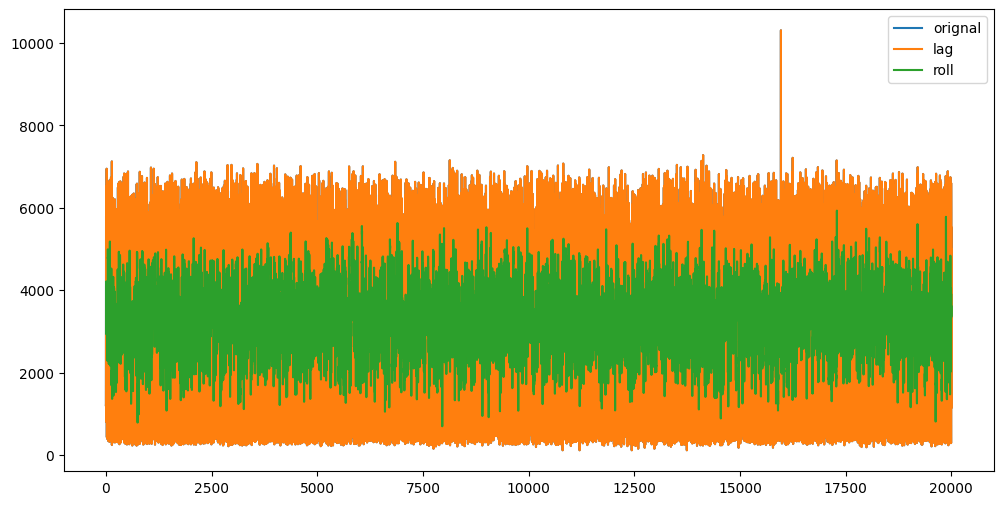

In [33]:
plt.figure(figsize=(12,6))
plt.plot(df['traffic_volume'], label='orignal')
plt.plot(df['traffic_volume_1'], label='lag')
plt.plot(df['traffic_volume_3'], label='roll')
plt.legend()
plt.show()

In [11]:
lags = []
for i in range(1, 6):
    ts_df[f'Lag_{i}'] = ts_df['traffic_volume'].shift(i)
    lags.append(f'Lag_{i}')


ts_df.dropna(inplace=True)

In [53]:
ts_df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,prev_traffic_volume,day_of_week,month,day_of_year,traffic_volume_diff
1970-01-01 00:00:00.000000000,1209.0,291.15,0.0,0.0,90,NaN,3,1,1,NaN
1970-01-01 00:00:00.000000001,1248.0,286.01,0.0,0.0,1,NaN,3,1,1,39.0
1970-01-01 00:00:00.000000002,4602.0,293.69,0.0,0.0,75,NaN,3,1,1,3354.0
1970-01-01 00:00:00.000000003,2838.0,262.35,0.0,0.0,1,NaN,3,1,1,-1764.0
1970-01-01 00:00:00.000000004,5794.0,267.08,0.0,0.0,5,NaN,3,1,1,2956.0


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

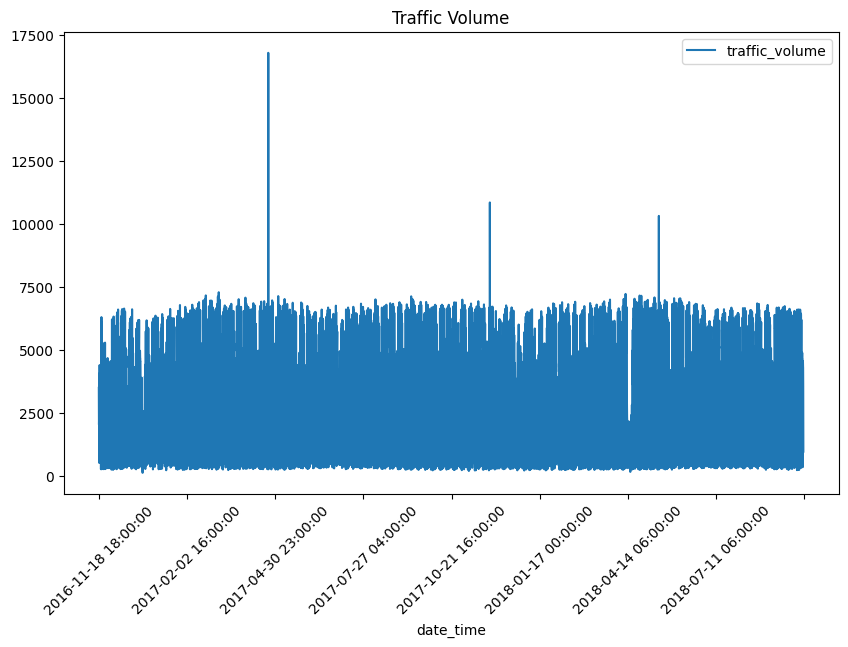

In [14]:
ts_df['traffic_volume'].rolling(window=3).mean()
ts_df[['traffic_volume']].plot(figsize=(10, 6))
plt.title('Traffic Volume')
plt.xticks(rotation=45)
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

#decomposition = seasonal_decompose(ts_df['traffic_volume'], model='additive')
#decomposition.plot()
plt.show()



#plt.figure(figsize=(10, 6))
#ts_df[['traffic_volume']].plot()
#plt.title('Traffic Volume')
#plt.show()

#decomposition = seasonal_decompose(ts_df['traffic_volume'])
#decomposition.plot()
#plt.show()

<Axes: >

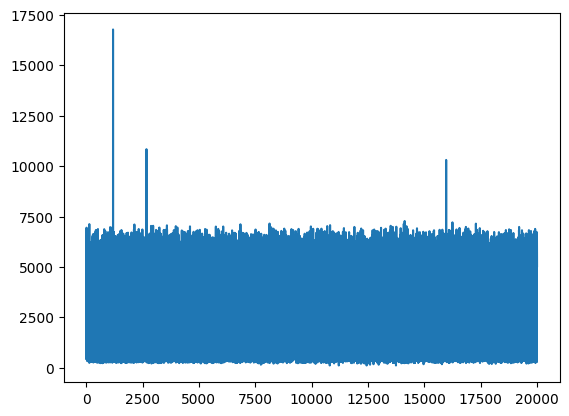

In [16]:
df['traffic_volume'].plot()

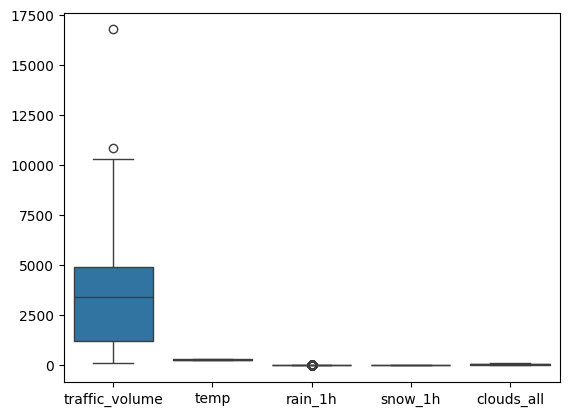

In [17]:
sns.boxplot(df)
plt.show()

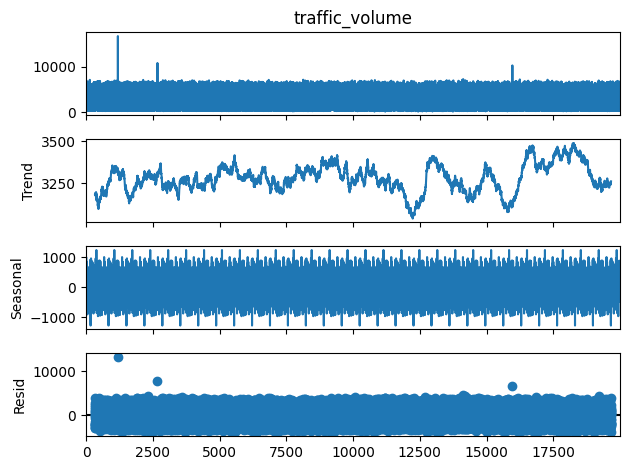

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['traffic_volume'], model='additive', period=672)
result.plot()
plt.show()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [36]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(24)

In [37]:
df.index = pd.to_datetime(df.index)
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear



In [39]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume_lag1,traffic_volume_lag2,traffic_volume_ma7,traffic_volume_ma30,traffic_volume_1,traffic_volume_2,traffic_volume_3,traffic_volume_4,prev_traffic_volume,day_of_week,month,day_of_year
1970-01-01 00:00:00.000000000,1209.0,291.15,0.0,0.0,90,5,16,2017-08-27 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1
1970-01-01 00:00:00.000000001,1248.0,286.01,0.0,0.0,1,0,25,2018-09-06 23:00:00,1209.0,NaN,NaN,NaN,1209.0,NaN,NaN,NaN,NaN,3,1,1
1970-01-01 00:00:00.000000002,4602.0,293.69,0.0,0.0,75,1,1,2017-08-25 18:00:00,1248.0,1209.0,NaN,NaN,1248.0,1209.0,NaN,NaN,NaN,3,1,1
1970-01-01 00:00:00.000000003,2838.0,262.35,0.0,0.0,1,0,25,2017-11-09 22:00:00,4602.0,1248.0,NaN,NaN,4602.0,1248.0,NaN,NaN,NaN,3,1,1
1970-01-01 00:00:00.000000004,5794.0,267.08,0.0,0.0,5,0,25,2017-11-09 15:00:00,2838.0,4602.0,NaN,NaN,2838.0,4602.0,NaN,NaN,NaN,3,1,1


In [41]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()


df['day_of_week'] = df.index.day_of_week
df['month'] = df.index.month
df['day_of_year'] = df.index.day_of_year


df.head()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume_lag1,traffic_volume_lag2,...,traffic_volume_ma30,traffic_volume_1,traffic_volume_2,traffic_volume_3,traffic_volume_4,prev_traffic_volume,day_of_week,month,day_of_year,traffic_volume_diff
1970-01-01 00:00:00.000000000,1209.0,291.15,0.0,0.0,90,5,16,2017-08-27 01:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,NaN
1970-01-01 00:00:00.000000001,1248.0,286.01,0.0,0.0,1,0,25,2018-09-06 23:00:00,1209.0,NaN,...,NaN,1209.0,NaN,NaN,NaN,NaN,3,1,1,39.0
1970-01-01 00:00:00.000000002,4602.0,293.69,0.0,0.0,75,1,1,2017-08-25 18:00:00,1248.0,1209.0,...,NaN,1248.0,1209.0,NaN,NaN,NaN,3,1,1,3354.0
1970-01-01 00:00:00.000000003,2838.0,262.35,0.0,0.0,1,0,25,2017-11-09 22:00:00,4602.0,1248.0,...,NaN,4602.0,1248.0,NaN,NaN,NaN,3,1,1,-1764.0
1970-01-01 00:00:00.000000004,5794.0,267.08,0.0,0.0,5,0,25,2017-11-09 15:00:00,2838.0,4602.0,...,NaN,2838.0,4602.0,NaN,NaN,NaN,3,1,1,2956.0


In [42]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume_lag1,traffic_volume_lag2,...,traffic_volume_ma30,traffic_volume_1,traffic_volume_2,traffic_volume_3,traffic_volume_4,prev_traffic_volume,day_of_week,month,day_of_year,traffic_volume_diff
1970-01-01 00:00:00.000000000,1209.0,291.15,0.0,0.0,90,5,16,2017-08-27 01:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,NaN
1970-01-01 00:00:00.000000001,1248.0,286.01,0.0,0.0,1,0,25,2018-09-06 23:00:00,1209.0,NaN,...,NaN,1209.0,NaN,NaN,NaN,NaN,3,1,1,39.0
1970-01-01 00:00:00.000000002,4602.0,293.69,0.0,0.0,75,1,1,2017-08-25 18:00:00,1248.0,1209.0,...,NaN,1248.0,1209.0,NaN,NaN,NaN,3,1,1,3354.0
1970-01-01 00:00:00.000000003,2838.0,262.35,0.0,0.0,1,0,25,2017-11-09 22:00:00,4602.0,1248.0,...,NaN,4602.0,1248.0,NaN,NaN,NaN,3,1,1,-1764.0
1970-01-01 00:00:00.000000004,5794.0,267.08,0.0,0.0,5,0,25,2017-11-09 15:00:00,2838.0,4602.0,...,NaN,2838.0,4602.0,NaN,NaN,NaN,3,1,1,2956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000019995,2723.0,296.42,0.0,0.0,40,1,23,2018-06-06 21:00:00,6601.0,288.0,...,3151.733333,6601.0,288.0,3347.000000,3151.733333,5954.0,3,1,1,-3878.0
1970-01-01 00:00:00.000019996,5895.0,285.58,0.0,0.0,40,1,23,2017-10-25 15:00:00,2723.0,6601.0,...,3272.100000,2723.0,6601.0,3623.285714,3272.100000,3117.0,3,1,1,3172.0
1970-01-01 00:00:00.000019997,1132.0,275.30,0.0,0.0,1,0,25,2018-03-28 23:00:00,5895.0,2723.0,...,3297.100000,5895.0,2723.0,3356.285714,3297.100000,4578.0,3,1,1,-4763.0
1970-01-01 00:00:00.000019998,5525.0,260.94,0.0,0.0,75,1,1,2018-02-12 15:00:00,1132.0,5895.0,...,3470.666667,1132.0,5895.0,3428.142857,3470.666667,5236.0,3,1,1,4393.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000019999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       20000 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  int64  
 6   weather_description  20000 non-null  int64  
 7   date_time            20000 non-null  object 
 8   traffic_volume_lag1  19999 non-null  float64
 9   traffic_volume_lag2  19998 non-null  float64
 10  traffic_volume_ma7   19994 non-null  float64
 11  traffic_volume_ma30  19971 non-null  float64
 12  traffic_volume_1     19999 non-null  float64
 13  traffic_volume_2     19998 non-null  float64
 14  traffic_volume_3     19994 non-null  floa

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [44]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time',
       'traffic_volume_lag1', 'traffic_volume_lag2', 'traffic_volume_ma7',
       'traffic_volume_ma30', 'traffic_volume_1', 'traffic_volume_2',
       'traffic_volume_3', 'traffic_volume_4', 'prev_traffic_volume',
       'day_of_week', 'month', 'day_of_year', 'traffic_volume_diff'],
      dtype='object')

In [45]:
dft = df[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time',
       'traffic_volume_lag1', 'traffic_volume_lag2', 'traffic_volume_ma7',
       'traffic_volume_ma30', 'traffic_volume_1', 'traffic_volume_2',
       'traffic_volume_3', 'traffic_volume_4', 'prev_traffic_volume',
       'day_of_week', 'month', 'day_of_year', 'traffic_volume_diff',]]

In [46]:
dft.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume_lag1,1
traffic_volume_lag2,2


In [47]:
dft.fillna(method='bfill', inplace=True)

<ipython-input-47-142000ceded3>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft.fillna(method='bfill', inplace=True)


In [25]:
from sklearn.model_selection import train_test_split

#X = ts_df.drop(columns=['traffic_volume'])
#y = ts_df['traffic_volume']

#X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2,shuffle=False)

In [49]:
earliest_date = dft.index.min()
latest_date = dft.index.max()

print(earliest_date)
print(latest_date)


1970-01-01 00:00:00
1970-01-01 00:00:00.000019999


In [52]:
train = dft.loc['2016-11-18':'2018-08-31']
val = dft.loc['2018-09-01':'2018-09-15']
test = dft.loc['2018-09-16':'2018-10-30']
train,val,test

(Empty DataFrame
 Columns: [traffic_volume, temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description, date_time, traffic_volume_lag1, traffic_volume_lag2, traffic_volume_ma7, traffic_volume_ma30, traffic_volume_1, traffic_volume_2, traffic_volume_3, traffic_volume_4, prev_traffic_volume, day_of_week, month, day_of_year, traffic_volume_diff]
 Index: []
 
 [0 rows x 21 columns],
 Empty DataFrame
 Columns: [traffic_volume, temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description, date_time, traffic_volume_lag1, traffic_volume_lag2, traffic_volume_ma7, traffic_volume_ma30, traffic_volume_1, traffic_volume_2, traffic_volume_3, traffic_volume_4, prev_traffic_volume, day_of_week, month, day_of_year, traffic_volume_diff]
 Index: []
 
 [0 rows x 21 columns],
 Empty DataFrame
 Columns: [traffic_volume, temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description, date_time, traffic_volume_lag1, traffic_volume_lag2, traffic_volume_ma7, traffic_volume_ma30, traff

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [26]:
 ts_df.describe()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
count,19946.000000,19946.000000,19946.000000,19946.0,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000
mean,3278.806177,281.172964,0.048527,0.0,49.343227,0.048527,0.048527,0.048527,0.048527,0.048527,3278.142334,-0.169357,2.969718,6.279605,175.834503
std,1977.774571,12.667753,0.398537,0.0,39.645123,0.398537,0.398537,0.398537,0.398537,0.398537,1977.771508,765.741782,2.015405,3.420623,104.779096
min,113.000000,243.390000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,-10061.000000,0.000000,1.000000,1.000000
25%,1228.000000,271.950000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1228.000000,-404.000000,1.000000,3.000000,87.000000
50%,3430.500000,281.865000,0.000000,0.0,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3427.000000,0.000000,3.000000,6.000000,172.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4928.000000,254.750000,5.000000,9.000000,258.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000,10.600000,10.600000,10.600000,10.600000,10.600000,16781.000000,11164.000000,6.000000,12.000000,366.000000


In [69]:
train = pd.DataFrame(train, columns=train.columns)
val = pd.DataFrame(val, columns=val.columns)
test = pd.DataFrame(test, columns=test.columns)

In [70]:
import tensorflow as tf
win = 2

train = tf.keras.utils.timeseries_dataset_from_array(train, targets=train.iloc[win:, 0], sequence_length=win)
val = tf.keras.utils.timeseries_dataset_from_array(val, targets=val.iloc[win:, 0], sequence_length=win)
test = tf.keras.utils.timeseries_dataset_from_array(test, targets=test.iloc[win:, 0], sequence_length=win)


ValueError: `sampling_rate` must be lower than the length of the data. Received: sampling_rate=1, for data of length 0

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [40]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.3 MB/s eta 0:00:00


In [42]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Conv1D
from tensorflow.keras.optimizers import Adam

In [59]:
SEED = 42
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [60]:
gru_model = Sequential([
    GRU(15, activation='tanh', return_sequences =True),
    GRU(15, activation='tanh'),

    Dense(8, activation='relu'),
    Dense(1, activation='relu'),
])

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [61]:
gru_model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse'])

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

check_gru = EarlyStopping(monitor='val_loss', patience=15)

In [63]:
gru_hist = gru_model.fit(xy_train, epochs=100, validation_data=xy_val, callbacks=[check_gru])

NameError: name 'xy_train' is not defined

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [46]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


In [64]:
seq_length = 24
X_train, y_train = create_sequences(train['traffic_volume'].values, seq_length)
X_val, y_val = create_sequences(val['traffic_volume'].values, seq_length)

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [62]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

In [49]:
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 14530613.0000 - val_loss: 2351601.2500
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 2506784.2500 - val_loss: 3866959.2500
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 3320957.0000 - val_loss: 2456499.5000
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 2595180.2500 - val_loss: 2101531.7500
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 2247433.0000 - val_loss: 1622632.1250
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 1664646.8750 - val_loss: 1386040.2500
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 1670842.6250 - val_loss: 1309846.5000
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 1370595.0000 - val_loss: 1169316.6250
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 11125556.0000 - val_loss: 3164121.5000
Epoch 10/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 2812333.2500 - val_loss: 1835049.7500


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [71]:
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = MeanAbsoluteError()
    mse = MeanSquaredError()
    mae.update_state(y_test, predictions)
    mse.update_state(y_test, predictions)
    rmse = np.sqrt(mse.result().numpy())
    print(f"MAE: {mae.result().numpy()}, MSE: {mse.result().numpy()}, RMSE: {rmse}")


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: